### Import Liabraries

In [ ]:
import pandas as pd
import seaborn as sns



### Import data

In [ ]:
data=pd.read_csv('heart.csv')

### data Preprocessing

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Removing Outlayers

In [ ]:
from scipy.stats import zscore

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
z_scores = data[numeric_cols].apply(zscore)
data = data[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]


### Data Encodign 

In [ ]:
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

### Standard Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
data.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

### visualization

<Axes: xlabel='Age', ylabel='RestingBP'>

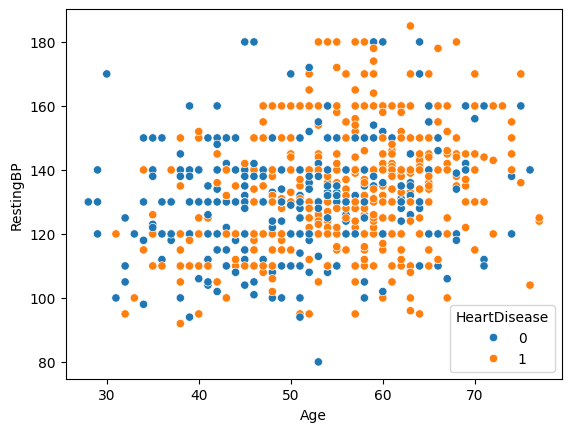

In [ ]:
sns.scatterplot(x='Age', y='RestingBP', hue='HeartDisease', data=data)

In [ ]:
sns.pairplot(data=data, hue='HeartDisease')

### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



SVM Accuracy: 0.8888888888888888


### Model

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))



Decision Tree Accuracy: 0.7777777777777778


In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, bagging_pred))

Bagging Accuracy: 0.8666666666666667
